In [1]:
from os import listdir
from dotenv import dotenv_values
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

exp_path = '../experiments/drug_sim_n10'
decagon_AUPRC = 0.832
transductive_AUPRC = 0.971

# Actual PPSE performance by psi value

In [4]:
# Read polySE results using aggregations in place of embeddings
polySE_true_dfs = []
for loc in listdir(exp_path):
    if loc.startswith('2024'):
        df = pd.read_csv(f'{exp_path}/{loc}/polySE_results_real_embeds.csv')
        df['psi'] = float(loc.split('psi_')[-1])
        df['Training'] = 'Out-of-sample LibKGE training'
        polySE_true_dfs.append(df)

# Also read equivalent results from chapter 3
chap3_path = dotenv_values()['THESIS_PATH'] + '/Chapter3/analysis/assessment/best_trials_assess/20230929-111630-simple_selfloops/results_full.csv'
df_c3 = pd.read_csv(chap3_path)
df_c3['psi'] = 0.0
df_c3['Training'] = 'Standard LibKGE training'
polySE_true_dfs.append(df_c3)

polySE_true = pd.concat(polySE_true_dfs)
polySE_true

,Relation,AUROC,AUPRC,AP@50,psi,Training
0,C0005779,0.978010,0.968558,1.000000,0.125,Out-of-sample LibKGE training
1,C0011991,0.972084,0.959103,1.000000,0.125,Out-of-sample LibKGE training
2,C0011860,0.980377,0.973008,1.000000,0.125,Out-of-sample LibKGE training
3,C0038395,0.972707,0.964872,1.000000,0.125,Out-of-sample LibKGE training
4,C1145670,0.967355,0.953580,1.000000,0.125,Out-of-sample LibKGE training
...,...,...,...,...,...,...
958,C0016665,0.995556,0.996028,1.000000,0.000,Standard LibKGE training
959,C0006846,0.996618,0.996923,1.000000,0.000,Standard LibKGE training
960,C0025637,0.995932,0.995983,0.978775,0.000,Standard LibKGE training
961,C0426636,0.996998,0.996954,1.000000,0.000,Standard LibKGE training


In [3]:
for psi, subdf in polySE_true.groupby('psi'):
    print(f'At psi = {psi}, median AUPRC = {subdf.AUPRC.median():.5f}')

At psi = 0.0, median AUPRC = 0.97138
At psi = 0.125, median AUPRC = 0.97143
At psi = 0.25, median AUPRC = 0.97155
At psi = 0.5, median AUPRC = 0.97184
At psi = 0.75, median AUPRC = 0.97129


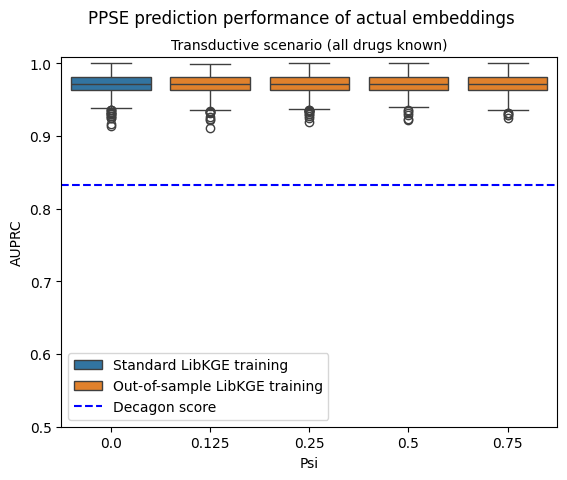

In [4]:
plt.clf()
sns.boxplot(polySE_true, x='psi', y='AUPRC', hue='Training')
xmin = -0.5
xmax = 4.5
plt.hlines(decagon_AUPRC, xmin=xmin, xmax=xmax, colors='blue', linestyles='dashed', label='Decagon score')
plt.suptitle('PPSE prediction performance of actual embeddings')
plt.title('Transductive scenario (all drugs known)', size=10)
plt.xlabel('Psi')
plt.ylim(bottom=0.5)
plt.xlim(xmin, xmax)
plt.legend()
plt.savefig('polySE_true_embeds.png')

# Cosine similarities of aggregated vectors to true embeddings

In [32]:
# Read cosine data
cosine_dfs = []
for loc in listdir(exp_path):
    if loc.startswith('2024'):
        df = pd.read_csv(f'{exp_path}/{loc}/cosines_vs_actual.csv')
        df['psi'] = float(loc.split('psi_')[-1])
        df['Training'] = 'Out-of-sample LibKGE training'
        cosine_dfs.append(df)

# Also read equivalent results from chapter 4
chap4_path = dotenv_values()['THESIS_PATH'] + '/Chapter4/data/results/cosines_vs_actual.csv'
df_c4= pd.read_csv(chap4_path)
df_c4 = df_c4.query('vector_method == "mean components" and neighbourhood_method == "drug similarity"')
df_c4['psi'] = 0.0
df_c4['Training'] = 'Standard LibKGE training'
df_c4['cosine_to_actual'] = df_c4['cosine_sim']
df_c4.drop(columns=['cosine_sim'], inplace=True)
cosine_dfs.append(df_c4)

cosines = pd.concat(cosine_dfs)
cosines

,drug,neighbourhood_method,vector_method,cosine_to_actual,psi,Training
0,CID000003954,drug similarity,mean components,0.908281,0.125,Out-of-sample LibKGE training
1,CID000004829,drug similarity,mean components,0.736625,0.125,Out-of-sample LibKGE training
2,CID000004140,drug similarity,mean components,0.937705,0.125,Out-of-sample LibKGE training
3,CID000002909,drug similarity,mean components,0.908819,0.125,Out-of-sample LibKGE training
4,CID000003676,drug similarity,mean components,0.472086,0.125,Out-of-sample LibKGE training
...,...,...,...,...,...,...
5467,CID006435110,drug similarity,mean components,0.717333,0.000,Standard LibKGE training
5479,CID006436173,drug similarity,mean components,0.499533,0.000,Standard LibKGE training
5485,CID006447131,drug similarity,mean components,0.604204,0.000,Standard LibKGE training
5491,CID006918453,drug similarity,mean components,0.588499,0.000,Standard LibKGE training


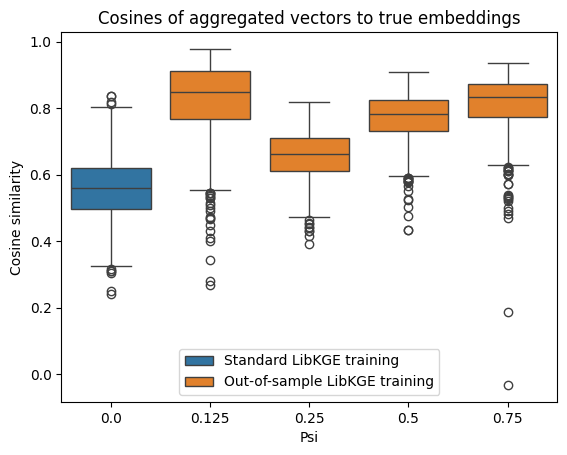

In [10]:
plt.clf()
sns.boxplot(cosines, x='psi', y='cosine_to_actual', hue='Training')
plt.title('Cosines of aggregated vectors to true embeddings')
plt.xlabel('Psi')
plt.ylabel('Cosine similarity')
plt.legend()
plt.savefig('cosines_vs_actual.png')

# PPSE performance using the aggregated vectors

array([0.])

In [2]:
# Read standard polySE results (i.e. using actual embeddings)
polySE_agg_dfs = []
for loc in listdir(exp_path):
    if loc.startswith('2024'):
        df = pd.read_csv(f'{exp_path}/{loc}/polySE_results_aggregations.csv')
        df['psi'] = float(loc.split('psi_')[-1])
        df['Training'] = 'Out-of-sample LibKGE training'
        polySE_agg_dfs.append(df)

# Also read equivalent results from chapter 3
chap4_agg_path = dotenv_values()['THESIS_PATH'] + '/Chapter4/data/results/polySE.csv'
chap4_agg = pd.read_csv(chap4_agg_path)
chap4_agg = chap4_agg.query('vector_method == "mean components" and neighbourhood_method == "drug similarity"')
chap4_agg['psi'] = 0.0
chap4_agg['Training'] = 'Standard LibKGE training'
chap4_agg.drop(columns=['neighbourhood_method', 'vector_method'], inplace=True)
polySE_agg_dfs.append(chap4_agg)

polySE_agg = pd.concat(polySE_agg_dfs)
polySE_agg

,side_effect,fake_triple_component,AUROC,AUPRC,AP50,psi,Training
0,C0000731,head,0.500000,0.500000,0.275912,0.125,Out-of-sample LibKGE training
1,C0000731,tail,0.500000,0.500000,0.275912,0.125,Out-of-sample LibKGE training
2,C0000731,both,0.500000,0.500000,0.275912,0.125,Out-of-sample LibKGE training
3,C0000737,head,0.677856,0.666066,0.674826,0.125,Out-of-sample LibKGE training
4,C0000737,tail,0.703890,0.697459,0.660958,0.125,Out-of-sample LibKGE training
...,...,...,...,...,...,...,...
23080,C0005001,head,0.759702,0.745933,0.902196,0.000,Standard LibKGE training
23081,C0005001,tail,0.841094,0.828883,0.939010,0.000,Standard LibKGE training
23103,C0020625,both,0.568307,0.549721,0.240306,0.000,Standard LibKGE training
23104,C0020625,head,0.790351,0.766044,0.950610,0.000,Standard LibKGE training


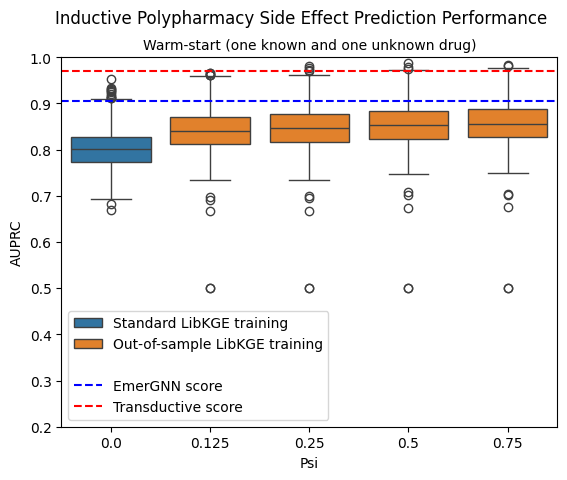

In [10]:
warm_start = polySE_agg.query('fake_triple_component != "both"')
sns.boxplot(warm_start, x='psi', y='AUPRC', hue='Training')

xmin = -0.5
xmax = 4.5
plt.hlines(-2, xmin=xmin, xmax=xmax, colors='white', linestyles='dashed', label=' ')  # To add gap in legend
plt.hlines(0.906, xmin=xmin, xmax=xmax, colors='blue', linestyles='dashed', label='EmerGNN score')
plt.hlines(transductive_AUPRC, xmin=xmin, xmax=xmax, colors='red', linestyles='dashed', label='Transductive score')
plt.ylim(0.2, 1)
plt.xlim(xmin, xmax)
plt.legend()
plt.suptitle('Inductive Polypharmacy Side Effect Prediction Performance')
plt.title('Warm-start (one known and one unknown drug)', size=10)
plt.xlabel('Psi')

#plt.tight_layout()
plt.savefig('polySE_agg_warm_start.png')

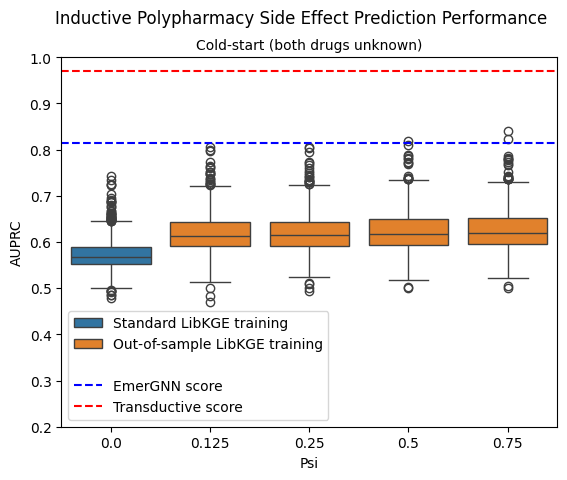

In [11]:
cold_start = polySE_agg.query('fake_triple_component == "both"')
sns.boxplot(cold_start, x='psi', y='AUPRC', hue='Training')

xmin = -0.5
xmax = 4.5
plt.xlim(xmin, xmax)
plt.hlines(-2, xmin=xmin, xmax=xmax, colors='white', linestyles='dashed', label=' ')  # To add gap in legend
plt.hlines(0.814, xmin=xmin, xmax=xmax, colors='blue', linestyles='dashed', label='EmerGNN score')
plt.hlines(transductive_AUPRC, xmin=xmin, xmax=xmax, colors='red', linestyles='dashed', label='Transductive score')
plt.ylim(0.2, 1.0)
plt.legend()
plt.suptitle('Inductive Polypharmacy Side Effect Prediction Performance')
plt.title('Cold-start (both drugs unknown)', size=10)
plt.xlabel('Psi')

#plt.tight_layout()
plt.savefig('polySE_agg_cold_start.png')

# Bits of analysis for paper and stuff

In [22]:
warm_OOS = polySE_agg.query('Training != "Standard LibKGE training" and fake_triple_component != "both"')
warm_standard = polySE_agg.query('Training == "Standard LibKGE training" and fake_triple_component != "both"')

print('Warm start: chapter 4 vs chapter 5:\n')
print(f'Standard LibKGE median AUPRC = {warm_standard.AUPRC.median()}')
for psi, subdf in warm_OOS.groupby('psi'):
    print(f'OOS psi = {psi}, median AUPRC = {subdf.AUPRC.median()}')

Warm start: chapter 4 vs chapter 5:

Standard LibKGE median AUPRC = 0.8005534279019861
OOS psi = 0.125, median AUPRC = 0.8400505352496238
OOS psi = 0.25, median AUPRC = 0.8455373821665053
OOS psi = 0.5, median AUPRC = 0.8526778016622881
OOS psi = 0.75, median AUPRC = 0.8553088548295023


In [23]:
cold_OOS = polySE_agg.query('Training != "Standard LibKGE training" and fake_triple_component == "both"')
cold_standard = polySE_agg.query('Training == "Standard LibKGE training" and fake_triple_component == "both"')


print('Cold start: chapter 4 vs chapter 5:\n')
print(f'Standard LibKGE median AUPRC = {cold_standard.AUPRC.median()}')
for psi, subdf in cold_OOS.groupby('psi'):
    print(f'OOS psi = {psi}, median AUPRC = {subdf.AUPRC.median()}')

Cold start: chapter 4 vs chapter 5:

Standard LibKGE median AUPRC = 0.5678348031246792
OOS psi = 0.125, median AUPRC = 0.6136335087204419
OOS psi = 0.25, median AUPRC = 0.6145371572966042
OOS psi = 0.5, median AUPRC = 0.6165419431076511
OOS psi = 0.75, median AUPRC = 0.6196297142239998


# Runtime analysis

In [21]:
# Load OOS experiment runtimes

runtimes_list = []
for n in [10]:#, 5, 20]:
    path = f'{exp_path}/drug_sim_n{n}'
    for exp in listdir(path):
        if exp.startswith('2024'):
            psi = float(exp.split('_')[-1])
            runtime_subdf = pd.read_csv(f'{path}/{exp}/epoch_runtimes.csv')
            runtime_subdf['psi'] = psi
            runtime_subdf['n'] = n
            runtimes_list.append(runtime_subdf)

runtimes = pd.concat(runtimes_list)
runtimes['Training'] = "Out-of-sample LibKGE training"
runtimes

,epoch,runtime,psi,n,Training
0,1,281.630746,0.125,10,Out-of-sample LibKGE training
1,2,282.338703,0.125,10,Out-of-sample LibKGE training
2,3,280.468856,0.125,10,Out-of-sample LibKGE training
3,4,276.472476,0.125,10,Out-of-sample LibKGE training
4,5,286.812582,0.125,10,Out-of-sample LibKGE training
...,...,...,...,...,...
395,396,1137.726648,0.750,10,Out-of-sample LibKGE training
396,397,1146.905002,0.750,10,Out-of-sample LibKGE training
397,398,1146.648423,0.750,10,Out-of-sample LibKGE training
398,399,1139.479320,0.750,10,Out-of-sample LibKGE training


In [22]:
# Load standard experiment runtimes
chap3_runtimes = pd.read_csv('../../../Chapter3/analysis/experiments/runtimes/per_epoch_runtimes.csv')

# Best checkpoint was SimplE model on selfloops dataset, trial 21 epoch 480
chap3_runtimes.query('dataset == "selfloops" and model == "simple" and trial == 21 and epoch <= 480', inplace=True)
chap3_runtimes = chap3_runtimes[['epoch', 'runtime']]
chap3_runtimes['psi'] = 0.0
chap3_runtimes['n'] = 'N/A'
chap3_runtimes['Training'] = "Standard LibKGE training"

runtimes = pd.concat([runtimes, chap3_runtimes])
runtimes

,epoch,runtime,psi,n,Training
0,1,281.630746,0.125,10,Out-of-sample LibKGE training
1,2,282.338703,0.125,10,Out-of-sample LibKGE training
2,3,280.468856,0.125,10,Out-of-sample LibKGE training
3,4,276.472476,0.125,10,Out-of-sample LibKGE training
4,5,286.812582,0.125,10,Out-of-sample LibKGE training
...,...,...,...,...,...
20047,476,117.971051,0.000,N/A,Standard LibKGE training
20048,477,118.652947,0.000,N/A,Standard LibKGE training
20049,478,118.595423,0.000,N/A,Standard LibKGE training
20050,479,118.569252,0.000,N/A,Standard LibKGE training


/var/folders/_x/2pk9s5z166x9c0h399wmby_h0000gp/T/ipykernel_1227/1458415774.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(runtimes, x='psi', y='runtime', hue='Training', ci='sd')


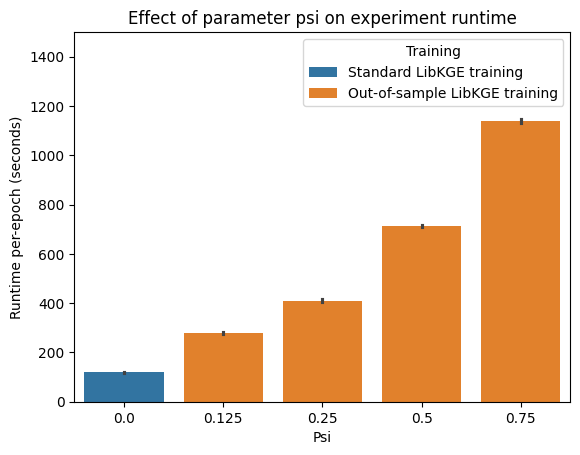

In [23]:
sns.barplot(runtimes, x='psi', y='runtime', hue='Training', ci='sd')
plt.ylim(0, 1500)
plt.xlabel('Psi')
plt.ylabel('Runtime per-epoch (seconds)')
plt.title('Effect of parameter psi on experiment runtime')
plt.savefig('runtime_vs_chap3.png')